0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

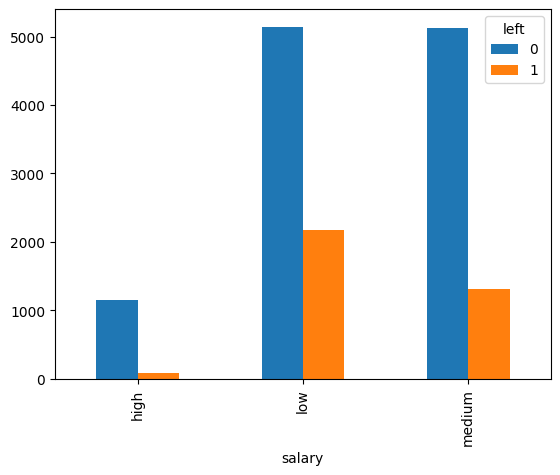

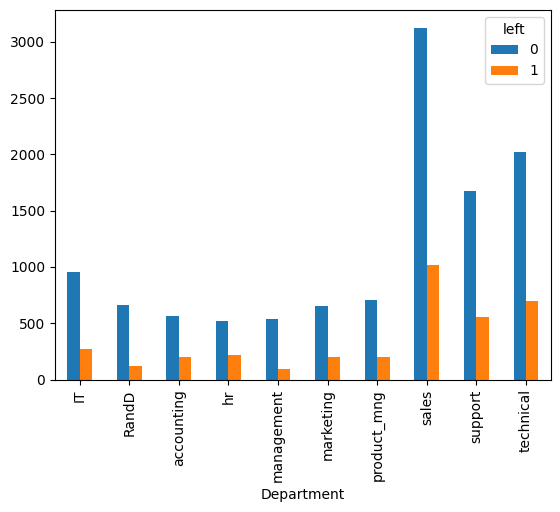

In [16]:
from re import sub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/drive/MyDrive/HR_comma_sep.csv')
df.head()

left = df.groupby('left')

pd.crosstab(df.salary,df.left).plot(kind='bar')

pd.crosstab(df.Department,df.left).plot(kind='bar')

# plt.show()

subdf = df[['satisfaction_level', 'average_montly_hours', 'time_spend_company', 'promotion_last_5years', 'salary']]
subdf.head()

# Handle The Text Data

salaries_dummies = pd.get_dummies(subdf.salary, prefix='salary')

df_with_dummies = pd.concat([subdf, salaries_dummies], axis='columns')

df_with_dummies.head()

df_with_dummies.drop('salary', axis='columns', inplace=True)

df_with_dummies.head()

x = df_with_dummies
x.head()

y = df.left
y.head()

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)

y_predicted = model.predict(x_test)

model.score(x_test, y_test)

0.7664444444444445

**Confusion Matrix**

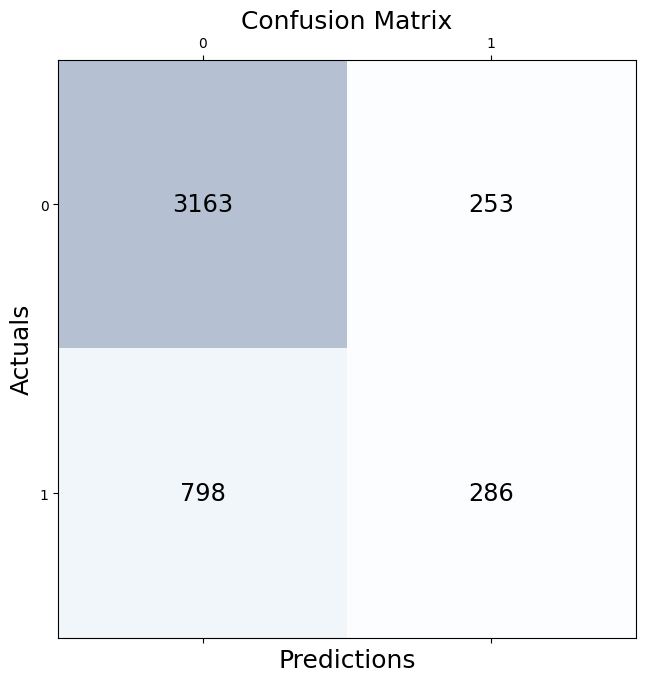

In [19]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

**Confusion Matrix Using Heatmap**

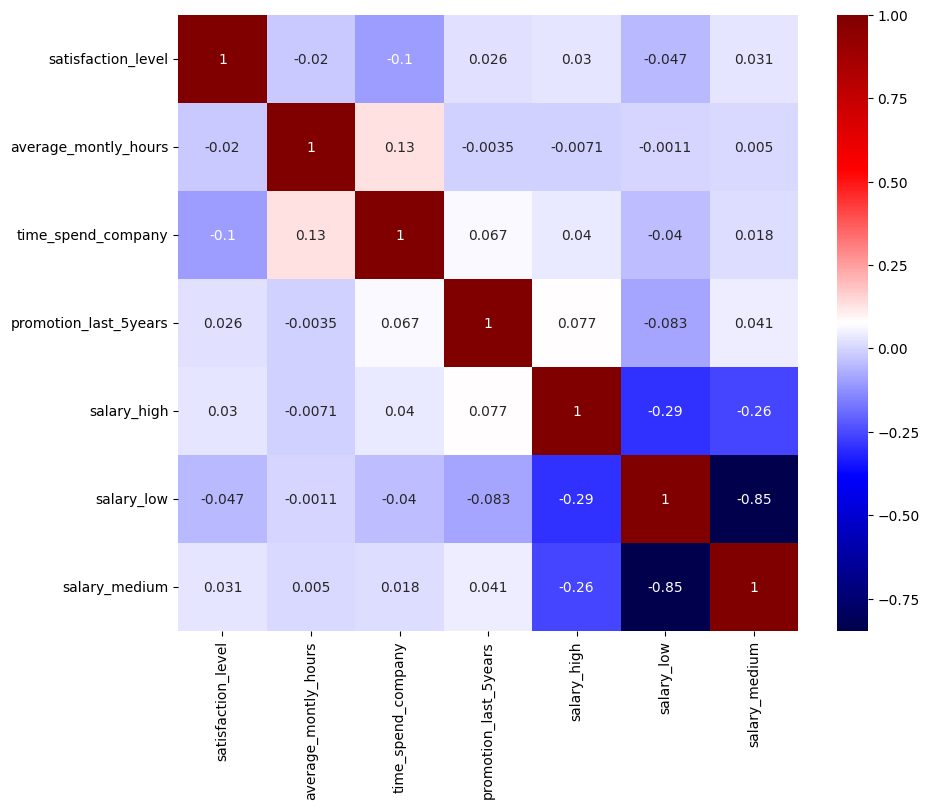

In [29]:
# Calculate the correlation matrix
correlation_matrix = df_with_dummies.corr()

# Create the Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='seismic')
plt.show()